In [3]:
import pyodbc
import time
import pandas as pd
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import seaborn as sns
import numpy as np
import math as math
%matplotlib inline
import sklearn_extensions as ske
from sklearn_extensions.fuzzy_kmeans import KMedians, FuzzyKMeans, KMeans
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor


from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.cluster import KMeans, MiniBatchKMeans, MeanShift, AgglomerativeClustering
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.decomposition import PCA

pd.options.mode.chained_assignment = None # gets rid of chaining warning

pd.set_option('max_rows', 150)
pd.set_option('max_columns', None)

C:\Users\cruzc\Anaconda3\envs\fnb\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.datasets.samples_generator module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.datasets. Anything that cannot be imported from sklearn.datasets is now part of the private API.
  warnings.warn(message, FutureWarning)


In [4]:
# Variables removed for privacy reasons

colors = ['red','orange','yellow','green','blue','purple','black','grey','brown','olive','aqua','coral','azure','indigo','gold']

def demo_graphs(data_hhold, data_freq, n_clusters):
    fig, ax = plt.subplots(2,3,figsize = (15,10))
    
    pd.crosstab(data_hhold['Segment'],[data_hhold[''],data_hhold['']]).plot(kind = 'bar', ax = ax[0][0])
    ax[0][0].legend(["NA", "",''])
    pd.crosstab(data_hhold['Segment'],[data_hhold[''],data_hhold['']]).plot(kind = 'bar',ax = ax[0][1])
    ax[0][1].legend(["NA", "",''])
    pd.crosstab(data_hhold['Segment'],[data_hhold[''],data_hhold[''],data_hhold['']]).plot(kind = 'bar', ax = ax[0][2])
    ax[0][2].legend(["NA",'','', ""]);
    pd.crosstab(data_hhold['Segment'],[data_hhold[''],data_hhold[''],data_hhold['']]).plot(kind = 'bar', ax = ax[1][0])
    ax[1][0].legend(["NA",'','', ""]);
    pd.crosstab(data_hhold['Segment'],[data_hhold[''],data_hhold['']]).plot(kind = 'bar', ax = ax[1][1])
    ax[1][1].legend(["NA",'', ""]);

    x = np.arange(n_clusters)
    ax[1][2].bar(x,data_freq['avg_age'],0.2,color = 'navy', label = 'Avg Age')
    ax[1][2].legend(loc = 'lower right');
    
def bar_chart_ob_fees(data,y_list):
    list_num = 0
    fig, ax = plt.subplots(2,math.ceil((len(y_list)/2)),figsize = (15,10))

    for i in range(2):
        for j in range(math.ceil((len(y_list)/2))):
            if list_num < len(y_list):
                ax[i][j].bar(data.index,data[y_list[list_num]])
                ax[i][j].set_title(y_list[list_num])
                list_num += 1
                
def bar_chart_trans(data,y_list):
    list_num = 0
    fig, ax = plt.subplots(math.ceil((len(y_list)/2)),2,figsize = (15,45))

    for i in range(math.ceil((len(y_list)/2))):
        for j in range(2):
            if list_num < math.ceil((len(y_list)/2)):
                if j == 0:
                    ax[i][j].bar(data.index,data[y_list[list_num]])
                    ax[i][j].set_title(y_list[list_num])              
                elif j == 1:
                    ax[i][j].bar(data.index,data[y_list[list_num + math.ceil((len(y_list)/2))]])
                    ax[i][j].set_title(y_list[list_num + math.ceil((len(y_list)/2))])
        list_num += 1
        
def zip_graphs(data, n_clust):
    fig, ax = plt.subplots(math.ceil((n_clust/2)),2,figsize = (15,25))
    col_count = 0
    
    for i in range(math.ceil((n_clust/2))):
        for j in range(2):
            new_data = data[data["Segment"] == i]
            ax[i][j].bar(new_data.loc[:, "":""].columns, new_data.loc[:, "":""].sum().values, 
                         tick_label = [str(x)[4:] for x in new_data.loc[:, "":""].columns], color = colors[col_count])
            ax[i][j].set_title(f'Segment {col_count}')
            col_count += 1
        
    plt.show();
    
def networth_graphs(data, n_clust):
    fig, ax = plt.subplots(math.ceil((n_clust/2)),2,figsize = (15,25))
    col_count = 0
   
    for i in range(math.ceil((n_clust/2))):
        for j in range(2):
            new_data = data[data["Segment"] == i]
            X = [str(x)[9:] for x in new_data.loc[:, '':''].columns]
            X = list(map(float, X))
            X = list(map(int, X))
            ascending = pd.DataFrame(data = X, columns = ["networth"])
            ascending["counts"] = new_data.loc[:, '':''].sum().values
            ascending = ascending.sort_values("networth")
            ax[i][j].bar(ascending["networth"], ascending["counts"], tick_label = ascending["networth"], color = colors[col_count])
            ax[i][j].set_title(f'Segment {col_count}')
            col_count += 1
       
    plt.show();
    
def bit_graphs(data_freq, n_clust):
    fig, ax = plt.subplots(2,1,figsize = (15,20)) 
    
    x = np.arange(n_clust)
    ax[0].bar(x-0.2,data_freq[''],0.2,color = 'navy', label = 'Brkge')
    ax[0].bar(x,data_freq[''],0.2,color = 'orange', label = 'Insur')
    ax[0].bar(x+0.2,data_freq[''],0.2,color = 'grey',label = 'Trust')
    ax[0].set_xlabel("Segment")
    ax[0].set_ylabel("Avg Num of Accounts")
    ax[0].legend(loc = 'lower right');
    
    x1 = np.arange(n_clust)
    ax[1].bar(x1-0.2,data_freq[''],0.2,color = 'green', label = 'Full')
    ax[1].bar(x1,data_freq[''],0.2,color = 'red', label = 'Partial')
    ax[1].set_xlabel("Segment")
    ax[1].legend(loc = 'lower right');
    
def sbloan_graphs(data, n_clusters):
    x = np.arange(n_clusters)
    plt.bar(x,data['']);
    
def feature_table(model_list, pca_truth_list, model_names, threshold,n_clust):
    
    top_features = np.full((n_clust, 2), str)
   
    for i in range(len(model_list)):
       
        if not pca_truth_list[i]:
            cluster_centers = pd.DataFrame(data = model_list[i].cluster_centers_, columns = active_accts_dummies.columns)
        else:
            cluster_centers = pd.DataFrame(data = model_list[i].cluster_centers_, columns = scores_pca.columns)
   
        for j in range(cluster_centers.shape[0]):
            curr_row = cluster_centers.iloc[j].copy()
            indexes = (np.where(curr_row.abs() > threshold))
            top_features[j][i] = abs(curr_row.iloc[indexes]).nlargest(3).index.values
        
    return pd.DataFrame(data = top_features, columns = model_names, index = np.arange(n_clust))

### CSV Data Retrieval

In [5]:
# Data removed for privacy reasons
active_accts = pd.read_csv(, index_col = "hkey")

In [6]:
# Changing the numeric categorical variables to a string
active_accts["ZIP"] = active_accts["ZIP"].astype(str)
active_accts['ZIP'] = [str(x)[0:2] for x in active_accts['ZIP']]   
active_accts["NETWORTH"] = active_accts["NETWORTH"].astype(str)

In [7]:
# Identified outliers
active_accts = active_accts.drop(labels = [227071, 387064,501403], axis = 0)

In [8]:
# Filter to the consumer only group
active_accts = active_accts[(active_accts["sum_smallbiz_flag"] == 0) & (active_accts["sum_consumer_flag"] > 0)]

In [9]:
# Filter out people older than 110
active_accts = active_accts[active_accts['avg_age'] < 110]

In [10]:
active_accts = active_accts[active_accts.avg_age > 0]

In [11]:
# Making the hkey the index
hkey_list = active_accts.index

In [12]:
active_accts.shape

(494253, 91)

### Dummy Variables

In [13]:
# Variables removed for privacy reasons
dummies = pd.get_dummies(active_accts[[]])
active_accts_dummies = pd.concat([active_accts, dummies], axis = 1)
active_accts_dummies = active_accts_dummies.drop(columns = [])

### Standardization

In [14]:
scaler = StandardScaler()

# Shuffles the data
active_accts_dummies = active_accts_dummies.sample(frac = 1, random_state = 42)

active_accts_std = scaler.fit_transform(active_accts_dummies)

active_accts_std = pd.DataFrame(active_accts_std, columns = active_accts_dummies.columns)

active_accts_std = active_accts_std.set_index(hkey_list)

### Cluster Sizes

In [15]:
inertia = []
for i in range(2,21):
    model = MiniBatchKMeans(n_clusters=i, random_state=0, init = 'k-means++').fit(active_accts_std)
    inertia.append(model.inertia_)
    
plt.figure(figsize = (10,8))
plt.xticks(range(0,19), range(2,21))
plt.suptitle('Small Business Mini Batch',fontsize=20)
plt.plot(inertia, marker = 'o');

In [16]:
from sklearn.metrics import silhouette_score

inertia =[]
sil =[]
    
for k in range(2,14):
    print(k)
    kmeans_rand = MiniBatchKMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans_rand.fit(active_accts_std)
    y_pred = kmeans_rand.predict(active_accts_std)
        
    inertia.append(kmeans_rand.inertia_)
    sil.append((k, silhouette_score(active_accts_std, y_pred, sample_size = 10000, random_state = 14)))
        
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(range(2,14), inertia, marker = 'o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
    
x_sil = [x[0] for x in sil]
y_sil = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil, marker = 'o')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

### KMiniBatch

In [17]:
mini_clusters = 5

In [18]:
minikmeans = MiniBatchKMeans(n_clusters = mini_clusters, init = 'k-means++', random_state = 14)
minikmeans.fit(active_accts_std)

MiniBatchKMeans(n_clusters=5, random_state=14)

#### MiniKMeans: Analysis

In [19]:
active_accts_minikmeans = active_accts_dummies.copy()
active_accts_minikmeans["Segment"] = minikmeans.labels_

In [20]:
# Add segments back to data without dummies for scatterplot
sorted_segments = active_accts_minikmeans.sort_index().loc[:,'Segment']
active_accts['Segment'] = sorted_segments
active_accts.head()

,avg_inv_bal,avg_ckcom_bal,avg_ckcon_bal,avg_indln_bal,avg_mtg_bal,avg_comln_bal,avg_conln_bal,avg_inv_num,avg_ckcom_num,avg_ckcon_num,avg_indln_num,avg_mtg_num,avg_comln_num,avg_conln_num,avg_bill_pay,avg_direct_deposit,avg_estatement,avg_mobile_app,avg_online_banking,sum_YTDINTPAID,sum_YTDITEMNSF,sum_YTDNSFFEE,sum_YTDNSFRTFA,sum_YTDODFEEAT,sum_YTDPDFEES,sum_YTDOTRCHG,sum_YTDPDINT,sum_YTDRTNNSF,sum_YTDSVC,sum_YTDSVCWVD,sum_YTDTIMEOD,sum_brokerage,sum_insurance,sum_trust,sum_full_charge_off,sum_partial_charge_off,sum_sbloan_flag,sum_smallbiz_flag,sum_consumer_flag,avg_age,ZIP,BIZRETL,ANNSPEND,educate,income,DWELTYPE,MORESPON,RISKIND,PROPTYPE,homemktvalue,LOR,NETWORTH,ownrent,total_ACH_DEPOSIT_trans,total_ATM_DEBIT_trans,total_AUTO_CR_TRANSFER_trans,total_AUTO_TRANSFER_DR_trans,total_Auto_Loan_Payment_trans,total_CHECK_trans,total_DEBIT_CARD_PURCHASE_trans,total_DEPOSIT_trans,total_FIRST_DESKTOP_DEPOSIT_trans,total_LOCKBOX_trans,total_MISC_CREDIT_trans,total_MISC_DEBIT_trans,total_MOBILE_DEPOSIT_trans,total_ONLINE_DEBIT_trans,total_POS_RETURN_trans,total_TRANSFER_CREDIT_trans,WIRE_trans,total_WITHDRAWAL_trans,total_ZELLE_trans,total_ACH_DEPOSIT_num,total_ATM_DEBIT_num,total_AUTO_CR_TRANSFER_num,total_AUTO_TRANSFER_DR_num,total_Auto_Loan_Payment_num,total_CHECK_num,total_DEBIT_CARD_PURCHASE_num,total_DEPOSIT_num,total_FIRST_DESKTOP_DEPOSIT_num,total_LOCKBOX_num,total_MISC_CREDIT_num,total_MISC_DEBIT_num,total_MOBILE_DEPOSIT_num,total_ONLINE_DEBIT_num,total_POS_RETURN_num,total_TRANSFER_CREDIT_num,WIRE_num,total_WITHDRAWAL_num,total_ZELLE_num,Segment
hkey,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
1,268972,0,3101,0,0,0,0,8.000000,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,1,618.24,0,0.0,0.0,0.0,0.0,0.0,618.24,0,0.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,60.666666,44,R,888.0,C,40to60,S,R,794.0,C,LTE300k,6.0,8.0,O,10.0,3.0,0.0,0.0,0.0,58.0,40.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,8749.0,550.0,0.0,0.0,0.0,5377.0,1999.0,1131.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
2,42782,0,6437,0,0,0,0,1.416667,0.0,1.0,0.0,0.0,0.0,0.0,0,1,1,0,0,2.85,0,0.0,0.0,0.0,0.0,0.0,2.85,0,0.0,0.0,0,7.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,64.000000,16,R,11126.0,C,NaN,S,R,815.0,C,LTE300k,15.0,9.0,O,6.0,20.0,0.0,0.0,0.0,14.0,4.0,1.0,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,0.0,0.0,0.0,32365.0,1940.0,0.0,0.0,0.0,7462.0,248.0,2800.0,0.0,0.0,0.0,0.0,0.0,2107.0,0.0,0.0,0.0,0.0,0.0,3
4,0,0,27509,0,0,0,0,0.000000,0.0,1.0,0.0,0.0,0.0,0.0,1,1,1,0,1,0.00,0,0.0,0.0,0.0,0.0,0.0,0.00,0,35.0,0.0,0,4.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,70.000000,21,R,888.0,C,40to60,S,R,817.0,C,GT300k,2.0,10.0,O,10.0,1.0,0.0,0.0,0.0,18.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,28168.0,60.0,0.0,0.0,0.0,7546.0,46.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
7,119110,0,0,0,0,0,0,2.000000,0.0,0.0,0.0,0.0,0.0,0.0,0,0,0,0,0,764.97,0,0.0,0.0,0.0,0.0,0.0,764.97,0,0.0,0.0,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,69.000000,15,R,888.0,C,40to60,S,R,766.0,C,LTE300k,3.0,7.0,O,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3
12,130002,0,99482,0,0,0,0,2.000000,0.0,1.0,0.0,0.0,0.0,0.0,0,1,0,0,0,113.91,0,0.0,0.0,0.0,0.0,0.0,113.91,0,0.0,0.0,0,2.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,73.000000,15,R,888.0,C,20to40,S,R,711.0,C,LTE100k,15.0,7.0,O,11.0,13.0,0.0,0.0,0.0,27.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,17776.0,6500.0,0.0,0.0,0.0,17607.0,0.0,23.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3


In [21]:
active_accts_mini_freq = active_accts_minikmeans.groupby(["Segment"]).mean()
active_accts_mini_freq["N Obs"] = active_accts_minikmeans[["Segment", "avg_inv_bal"]].groupby(["Segment"]).count()
active_accts_mini_freq["Prop Obs"] = active_accts_mini_freq["N Obs"] / active_accts_mini_freq["N Obs"].sum()
active_accts_mini_freq = active_accts_mini_freq.sort_values('N Obs')
active_accts_mini_freq = active_accts_mini_freq.reset_index()
active_accts_mini_freq.index.name = 'Sorted Segments'
active_accts_mini_freq

active_accts_minikmeans['Segment'] = active_accts_minikmeans['Segment'].map(dict(zip(list(active_accts_mini_freq["Segment"]),list(active_accts_mini_freq.index))))
active_accts_mini_freq

,Segment,avg_inv_bal,avg_ckcom_bal,avg_ckcon_bal,avg_indln_bal,avg_mtg_bal,avg_comln_bal,avg_conln_bal,avg_inv_num,avg_ckcom_num,avg_ckcon_num,avg_indln_num,avg_mtg_num,avg_comln_num,avg_conln_num,avg_bill_pay,avg_direct_deposit,avg_estatement,avg_mobile_app,avg_online_banking,sum_YTDINTPAID,sum_YTDITEMNSF,sum_YTDNSFFEE,sum_YTDNSFRTFA,sum_YTDODFEEAT,sum_YTDPDFEES,sum_YTDOTRCHG,sum_YTDPDINT,sum_YTDRTNNSF,sum_YTDSVC,sum_YTDSVCWVD,sum_YTDTIMEOD,sum_brokerage,sum_insurance,sum_trust,sum_full_charge_off,sum_partial_charge_off,sum_sbloan_flag,sum_consumer_flag,avg_age,ANNSPEND,RISKIND,LOR,total_ACH_DEPOSIT_trans,total_ATM_DEBIT_trans,total_AUTO_CR_TRANSFER_trans,total_AUTO_TRANSFER_DR_trans,total_Auto_Loan_Payment_trans,total_CHECK_trans,total_DEBIT_CARD_PURCHASE_trans,total_DEPOSIT_trans,total_FIRST_DESKTOP_DEPOSIT_trans,total_LOCKBOX_trans,total_MISC_CREDIT_trans,total_MISC_DEBIT_trans,total_MOBILE_DEPOSIT_trans,total_ONLINE_DEBIT_trans,total_POS_RETURN_trans,total_TRANSFER_CREDIT_trans,WIRE_trans,total_WITHDRAWAL_trans,total_ZELLE_trans,total_ACH_DEPOSIT_num,total_ATM_DEBIT_num,total_AUTO_CR_TRANSFER_num,total_AUTO_TRANSFER_DR_num,total_Auto_Loan_Payment_num,total_CHECK_num,total_DEBIT_CARD_PURCHASE_num,total_DEPOSIT_num,total_FIRST_DESKTOP_DEPOSIT_num,total_LOCKBOX_num,total_MISC_CREDIT_num,total_MISC_DEBIT_num,total_MOBILE_DEPOSIT_num,total_ONLINE_DEBIT_num,total_POS_RETURN_num,total_TRANSFER_CREDIT_num,WIRE_num,total_WITHDRAWAL_num,total_ZELLE_num,ZIP_14,ZIP_15,ZIP_16,ZIP_17,ZIP_18,ZIP_19,ZIP_20,ZIP_21,ZIP_22,ZIP_23,ZIP_26,ZIP_27,ZIP_28,ZIP_29,ZIP_32,ZIP_33,ZIP_34,ZIP_37,ZIP_43,ZIP_44,educate_C,educate_NC,income_0to20,income_100to150,income_150plus,income_20to40,income_40to60,income_60to75,income_75to100,homemktvalue_GT300k,homemktvalue_LTE100k,homemktvalue_LTE300k,DWELTYPE_M,DWELTYPE_S,MORESPON_R,PROPTYPE_A,PROPTYPE_B,PROPTYPE_C,NETWORTH_1.0,NETWORTH_10.0,NETWORTH_11.0,NETWORTH_2.0,NETWORTH_3.0,NETWORTH_4.0,NETWORTH_5.0,NETWORTH_6.0,NETWORTH_7.0,NETWORTH_8.0,NETWORTH_9.0,ownrent_O,ownrent_R,N Obs,Prop Obs
Sorted Segments,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,0,18665.957458,1631.207648,13661.768549,32.749304,10765.637883,2723.953406,107.085591,0.434927,0.010849,0.946643,0.003587,0.140657,0.014145,0.110176,0.078501,0.537098,0.496075,0.288934,0.356293,868.122644,0.222841,6.849076,0.936946,1.169185,23.112801,7.552965,868.122644,0.026589,3.936619,0.046075,0.104837,0.062547,0.005065,0.004811,0.013168,0.000000,0.000000,1.770575,60.846002,10926.049633,762.579894,7.926564,6.941251,1.083565,0.045834,0.072677,0.211193,12.507217,29.327425,1.620663,0.020258,0.000000,0.043809,0.044315,0.293239,0.557356,0.413016,0.013421,0.021524,0.005318,0.223348,11134.122309,201.793365,45.367435,37.377817,162.156242,11510.798683,1504.513041,7642.898202,928.603697,0.000000,388.818182,226.444670,214.298557,1356.519878,35.589516,633.968853,1750.934920,33.554318,61.659661,0.001013,0.050393,0.066852,0.057736,0.012155,0.014940,0.025070,0.067612,0.008103,0.005571,0.000253,0.581666,0.046341,0.010129,0.003545,0.004558,0.003292,0.001519,0.001519,0.015700,0.321854,0.494302,0.020512,0.036718,0.013421,0.070651,0.100532,0.614839,0.069131,0.846543,0.004052,0.149405,0.008610,0.987592,0.856926,0.003798,0.022284,0.963788,0.000000,0.043809,0.017473,0.000253,0.000506,0.000760,0.000506,0.004052,0.003292,0.009116,0.919473,0.937199,0.004305,3949,0.007990
1,4,16869.894187,0.419723,8146.859622,187.060384,411.854543,6.965152,112.965435,0.638209,0.000647,0.825380,0.020496,0.043195,0.000941,0.109669,0.021586,0.552624,0.234058,0.109904,0.162528,133.127740,0.233070,7.031462,1.106659,1.169300,1.754506,7.578379,133.127740,0.030756,1.384831,0.009876,0.105672,0.094244,0.004374,0.000141,0.060525,0.000988,0.000000,1.677765,69.784075,8987.312077,693.307985,12.162669,4.674379,1.999012,0.060243,0.106236,0.166337,9.821670,22.806857,1.132760,0.000000,0.000000,0.032026,0.039362,0.060807,0.153499,0.29

In [22]:
#bar_chart_trans(active_accts_mini_freq,active_accts_mini_freq.loc[:,'avg_inv_bal':'avg_conln_num'].columns)

In [23]:
#demo_graphs(active_accts_minikmeans, active_accts_mini_freq, mini_clusters)

In [24]:
#bar_chart_ob_fees(active_accts_mini_freq, active_accts_mini_freq.loc[:,'avg_bill_pay':'avg_online_banking'].columns)

In [25]:
#bar_chart_ob_fees(active_accts_mini_freq,active_accts_mini_freq.loc[:,'sum_YTDINTPAID':'sum_YTDTIMEOD'].columns)

In [26]:
#bar_chart_trans(active_accts_mini_freq,active_accts_mini_freq.loc[:,'total_ACH_DEPOSIT_trans':'total_ZELLE_num'].columns)

In [27]:
#zip_graphs(active_accts_minikmeans, mini_clusters)

In [28]:
#networth_graphs(active_accts_minikmeans, mini_clusters)

In [29]:
#bit_graphs(active_accts_mini_freq, mini_clusters)

In [30]:
#sbloan_graphs(active_accts_mini_freq, mini_clusters)

### MiniBatch with PCA

In [31]:
pca = PCA()
pca.fit(active_accts_std)

PCA()

Text(0, 0.5, 'Cumulative Explained Variance')

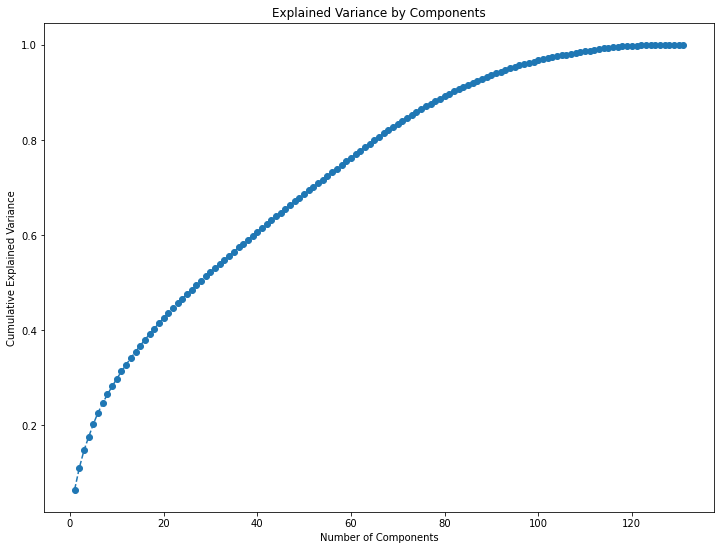

In [32]:
plt.figure(figsize = (12, 9))
plt.plot(range(1, len(pca.explained_variance_ratio_)+1), pca.explained_variance_ratio_.cumsum(), marker = 'o', linestyle = '--')
plt.title("Explained Variance by Components")
plt.xlabel("Number of Components")
plt.ylabel("Cumulative Explained Variance")

In [33]:
n_comps = 80
pca = PCA(n_components = n_comps)
pca.fit(active_accts_std)

PCA(n_components=80)

In [34]:
comp_list = []
for i in range(1, n_comps+1):
    comp_list.append(f'Component {i}')

active_accts_pca_comp = pd.DataFrame(data = pca.components_,
                        columns = active_accts_dummies.columns.values,
                        index = comp_list)
active_accts_pca_comp.head()

,avg_inv_bal,avg_ckcom_bal,avg_ckcon_bal,avg_indln_bal,avg_mtg_bal,avg_comln_bal,avg_conln_bal,avg_inv_num,avg_ckcom_num,avg_ckcon_num,avg_indln_num,avg_mtg_num,avg_comln_num,avg_conln_num,avg_bill_pay,avg_direct_deposit,avg_estatement,avg_mobile_app,avg_online_banking,sum_YTDINTPAID,sum_YTDITEMNSF,sum_YTDNSFFEE,sum_YTDNSFRTFA,sum_YTDODFEEAT,sum_YTDPDFEES,sum_YTDOTRCHG,sum_YTDPDINT,sum_YTDRTNNSF,sum_YTDSVC,sum_YTDSVCWVD,sum_YTDTIMEOD,sum_brokerage,sum_insurance,sum_trust,sum_full_charge_off,sum_partial_charge_off,sum_sbloan_flag,sum_consumer_flag,avg_age,ANNSPEND,RISKIND,LOR,total_ACH_DEPOSIT_trans,total_ATM_DEBIT_trans,total_AUTO_CR_TRANSFER_trans,total_AUTO_TRANSFER_DR_trans,total_Auto_Loan_Payment_trans,total_CHECK_trans,total_DEBIT_CARD_PURCHASE_trans,total_DEPOSIT_trans,total_FIRST_DESKTOP_DEPOSIT_trans,total_LOCKBOX_trans,total_MISC_CREDIT_trans,total_MISC_DEBIT_trans,total_MOBILE_DEPOSIT_trans,total_ONLINE_DEBIT_trans,total_POS_RETURN_trans,total_TRANSFER_CREDIT_trans,WIRE_trans,total_WITHDRAWAL_trans,total_ZELLE_trans,total_ACH_DEPOSIT_num,total_ATM_DEBIT_num,total_AUTO_CR_TRANSFER_num,total_AUTO_TRANSFER_DR_num,total_Auto_Loan_Payment_num,total_CHECK_num,total_DEBIT_CARD_PURCHASE_num,total_DEPOSIT_num,total_FIRST_DESKTOP_DEPOSIT_num,total_LOCKBOX_num,total_MISC_CREDIT_num,total_MISC_DEBIT_num,total_MOBILE_DEPOSIT_num,total_ONLINE_DEBIT_num,total_POS_RETURN_num,total_TRANSFER_CREDIT_num,WIRE_num,total_WITHDRAWAL_num,total_ZELLE_num,ZIP_14,ZIP_15,ZIP_16,ZIP_17,ZIP_18,ZIP_19,ZIP_20,ZIP_21,ZIP_22,ZIP_23,ZIP_26,ZIP_27,ZIP_28,ZIP_29,ZIP_32,ZIP_33,ZIP_34,ZIP_37,ZIP_43,ZIP_44,educate_C,educate_NC,income_0to20,income_100to150,income_150plus,income_20to40,income_40to60,income_60to75,income_75to100,homemktvalue_GT300k,homemktvalue_LTE100k,homemktvalue_LTE300k,DWELTYPE_M,DWELTYPE_S,MORESPON_R,PROPTYPE_A,PROPTYPE_B,PROPTYPE_C,NETWORTH_1.0,NETWORTH_10.0,NETWORTH_11.0,NETWORTH_2.0,NETWORTH_3.0,NETWORTH_4.0,NETWORTH_5.0,NETWORTH_6.0,NETWORTH_7.0,NETWORTH_8.0,NETWORTH_9.0,ownrent_O,ownrent_R
Component 1,0.081132,0.243362,0.048842,0.017434,0.037801,0.192703,0.015686,0.060969,0.211254,0.105350,0.019349,0.019866,0.183878,0.023885,0.054233,0.105745,0.097615,0.102203,0.077463,0.152307,0.031034,0.027777,0.015431,0.010652,0.131449,0.006639,0.152307,0.013847,0.219453,0.064122,0.033929,0.013808,0.036338,0.028326,-0.013157,0.000862,0.003779,0.108278,-0.009875,0.017097,0.025834,0.014611,0.174235,0.043417,0.150027,0.137379,0.086951,0.232182,0.076388,0.147835,0.212687,0.052077,0.077120,0.053132,0.045721,0.123070,0.037223,0.180196,0.147703,0.016645,0.013069,0.186542,0.037807,0.140989,0.139943,0.099082,0.244838,0.080515,0.077017,0.189393,0.046137,0.154631,0.069693,0.043441,0.204779,0.025473,0.187296,0.134856,0.001990,0.018069,-0.001406,0.004026,0.008199,-0.002847,-0.001237,-0.001349,-0.000516,0.001909,-0.001010,-0.002297,-0.000716,-0.005002,-0.000994,-0.002107,-0.001443,-0.002428,-0.001286,-0.001379,-0.002768,-0.001492,0.015637,-0.000572,-0.012025,0.011312,0.014464,-0.008986,0.001310,0.007183,0.011038,0.020422,-0.010559,-0.004456,-0.025136,0.025910,0.025109,-0.023984,-0.002797,0.022294,-0.024325,0.011932,0.021919,-0.012644,-0.007936,-0.005985,-0.002257,0.000263,0.007220,0.010162,0.009068,0.030702,-0.012883
Component 2,0.021366,0.096343,-0.013627,-0.045008,0.056094,0.092591,-0.005625,-0.089403,0.073930,-0.279813,-0.053577,0.062971,0.069407,-0.045045,-0.112582,-0.246651,-0.256347,-0.273396,-0.200596,0.099987,-0.143859,-0.132508,-0.084267,-0.086938,0.064731,-0.016358,0.099987,-0.078358,0.071675,0.029379,-0.152230,-0.018966,0.004295,0.003112,0.031692,-0.000361,0.003052,-0.211833,0.085960,0.016264,-0.009548,-0.005411,-0.169472,-0.178145,0.015375,-0.009864,-0.054009,0.018238,-0.286428,-0.036949,0.101510,0.026300,0.003124,-0.003733,-0.122654,-0.160147,-0.164773,0.083383,0.079366,-0.013813,-0.049791,0.032308,-0.151020,0.060937,0.060936,0.045612,0.103395,-0.279164,0.008366,0.095155,0.024579,0.081518,0.032721,-0.059734,0.086844,-0.120090,0.092698,0.075236,-0.

In [35]:
scores_pca = pca.transform(active_accts_std)

In [36]:
scores_pca = pd.DataFrame(scores_pca, columns = comp_list)

scores_pca = scores_pca.set_index(hkey_list)

In [37]:
inertia = []
for i in range(2,21):
    minikmeans_pca = MiniBatchKMeans(n_clusters = i, init = 'k-means++', random_state = 14).fit(scores_pca)
    inertia.append(minikmeans_pca.inertia_)
    #print(i)
    
plt.figure(figsize = (10,8))
plt.xticks(range(0,19), range(2,21))
plt.suptitle('Small Business Mini Batch + PCA',fontsize=20)
plt.plot(inertia, marker = 'o');

## Cluster Size

In [38]:
from sklearn.metrics import silhouette_score

inertia =[]
sil =[]
    
for k in range(2,14):
    #print(k)
    kmeans_rand = MiniBatchKMeans(n_clusters=k, init='k-means++', random_state=0)
    kmeans_rand.fit(scores_pca)
    y_pred = kmeans_rand.predict(scores_pca)
        
    inertia.append(kmeans_rand.inertia_)
    sil.append((k, silhouette_score(scores_pca, y_pred, sample_size = 10000, random_state = 14)))
        
fig, ax = plt.subplots(1, 2, figsize=(12,4))
ax[0].plot(range(2,14), inertia, marker = 'o')
ax[0].set_title('Elbow Method')
ax[0].set_xlabel('Number of clusters')
ax[0].set_ylabel('Inertia')
    
x_sil = [x[0] for x in sil]
y_sil = [x[1] for x in sil]
ax[1].plot(x_sil, y_sil, marker = 'o')
ax[1].set_xlabel('Number of Clusters')
ax[1].set_ylabel('Silhouetter Score')
ax[1].set_title('Silhouetter Score Curve')

In [39]:
minipca_clusters = 4

In [40]:
minikmeans_pca = MiniBatchKMeans(n_clusters = minipca_clusters, init = 'k-means++', random_state = 14)
minikmeans_pca.fit(scores_pca)

MiniBatchKMeans(n_clusters=4, random_state=14)

In [41]:
active_accts_mini_pca = pd.concat([active_accts_dummies, scores_pca], axis = 1)
active_accts_mini_pca.columns.values[0-n_comps:] = comp_list
active_accts_mini_pca["Segment"] = minikmeans_pca.labels_
active_accts_mini_pca

In [42]:
active_accts_mini_pca_freq = active_accts_mini_pca.groupby(["Segment"]).mean()
active_accts_mini_pca_freq["N Obs"] = active_accts_mini_pca[["Segment", "avg_inv_bal"]].groupby(["Segment"]).count()
active_accts_mini_pca_freq["Prop Obs"] = active_accts_mini_pca_freq["N Obs"] / active_accts_mini_pca_freq["N Obs"].sum()
active_accts_mini_pca_freq = active_accts_mini_pca_freq.sort_values('N Obs')
active_accts_mini_pca_freq = active_accts_mini_pca_freq.reset_index()
active_accts_mini_pca_freq.index.name = 'Sorted Segments'

active_accts_mini_pca['Segment'] = active_accts_mini_pca['Segment'].map(dict(zip(list(active_accts_mini_pca_freq["Segment"]),list(active_accts_mini_pca_freq.index))))
active_accts_mini_pca_freq

,Segment,avg_inv_bal,avg_ckcom_bal,avg_ckcon_bal,avg_indln_bal,avg_mtg_bal,avg_comln_bal,avg_conln_bal,avg_inv_num,avg_ckcom_num,avg_ckcon_num,avg_indln_num,avg_mtg_num,avg_comln_num,avg_conln_num,avg_bill_pay,avg_direct_deposit,avg_estatement,avg_mobile_app,avg_online_banking,sum_YTDINTPAID,sum_YTDITEMNSF,sum_YTDNSFFEE,sum_YTDNSFRTFA,sum_YTDODFEEAT,sum_YTDPDFEES,sum_YTDOTRCHG,sum_YTDPDINT,sum_YTDRTNNSF,sum_YTDSVC,sum_YTDSVCWVD,sum_YTDTIMEOD,sum_brokerage,sum_insurance,sum_trust,sum_full_charge_off,sum_partial_charge_off,sum_sbloan_flag,sum_consumer_flag,avg_age,ANNSPEND,RISKIND,LOR,total_ACH_DEPOSIT_trans,total_ATM_DEBIT_trans,total_AUTO_CR_TRANSFER_trans,total_AUTO_TRANSFER_DR_trans,total_Auto_Loan_Payment_trans,total_CHECK_trans,total_DEBIT_CARD_PURCHASE_trans,total_DEPOSIT_trans,total_FIRST_DESKTOP_DEPOSIT_trans,total_LOCKBOX_trans,total_MISC_CREDIT_trans,total_MISC_DEBIT_trans,total_MOBILE_DEPOSIT_trans,total_ONLINE_DEBIT_trans,total_POS_RETURN_trans,total_TRANSFER_CREDIT_trans,WIRE_trans,total_WITHDRAWAL_trans,total_ZELLE_trans,total_ACH_DEPOSIT_num,total_ATM_DEBIT_num,total_AUTO_CR_TRANSFER_num,total_AUTO_TRANSFER_DR_num,total_Auto_Loan_Payment_num,total_CHECK_num,total_DEBIT_CARD_PURCHASE_num,total_DEPOSIT_num,total_FIRST_DESKTOP_DEPOSIT_num,total_LOCKBOX_num,total_MISC_CREDIT_num,total_MISC_DEBIT_num,total_MOBILE_DEPOSIT_num,total_ONLINE_DEBIT_num,total_POS_RETURN_num,total_TRANSFER_CREDIT_num,WIRE_num,total_WITHDRAWAL_num,total_ZELLE_num,ZIP_14,ZIP_15,ZIP_16,ZIP_17,ZIP_18,ZIP_19,ZIP_20,ZIP_21,ZIP_22,ZIP_23,ZIP_26,ZIP_27,ZIP_28,ZIP_29,ZIP_32,ZIP_33,ZIP_34,ZIP_37,ZIP_43,ZIP_44,educate_C,educate_NC,income_0to20,income_100to150,income_150plus,income_20to40,income_40to60,income_60to75,income_75to100,homemktvalue_GT300k,homemktvalue_LTE100k,homemktvalue_LTE300k,DWELTYPE_M,DWELTYPE_S,MORESPON_R,PROPTYPE_A,PROPTYPE_B,PROPTYPE_C,NETWORTH_1.0,NETWORTH_10.0,NETWORTH_11.0,NETWORTH_2.0,NETWORTH_3.0,NETWORTH_4.0,NETWORTH_5.0,NETWORTH_6.0,NETWORTH_7.0,NETWORTH_8.0,NETWORTH_9.0,ownrent_O,ownrent_R,Component 1,Component 2,Component 3,Component 4,Component 5,Component 6,Component 7,Component 8,Component 9,Component 10,Component 11,Component 12,Component 13,Component 14,Component 15,Component 16,Component 17,Component 18,Component 19,Component 20,Component 21,Component 22,Component 23,Component 24,Component 25,Component 26,Component 27,Component 28,Component 29,Component 30,Component 31,Component 32,Component 33,Component 34,Component 35,Component 36,Component 37,Component 38,Component 39,Component 40,Component 41,Component 42,Component 43,Component 44,Component 45,Component 46,Component 47,Component 48,Component 49,Component 50,Component 51,Component 52,Component 53,Component 54,Component 55,Component 56,Component 57,Component 58,Component 59,Component 60,Component 61,Component 62,Component 63,Component 64,Component 65,Component 66,Component 67,Component 68,Component 69,Component 70,Component 71,Component 72,Component 73,Component 74,Component 75,Component 76,Component 77,Component 78,Component 79,Component 80,N Obs,Prop Obs
Sorted Segments,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
0,2,14420.150798,774.413798,8926.983931,446.854578,6278.420819,2750.435604,164.177299,0.567049,0.009038,1.139184,0.039027,0.094325,0.008816,0.101980,0.080404,0.669896,0.765808,0.554185,0.347396,506.846605,0.833333,22.524515,2.704783,3.393351,16.826405,17.939122,506.846605,0.079482,4.470343,0.169565,0.342200,0.078820,0.004995,0.002086,0.025839,0.000802,0.000000,2.014203,54.676431,9749.196437,712.290784,8.778025,9.729999,3.826252,0.106343,0.214191,0.337847,8.619744,68.201212,1.640507,0.046582,0.000823,0.057996,0.048828,0.543332,1.682435,1.376605,0.028747,0.021505,0.005758,0.433598,11156.353595,576.806131,737.147167,718.407178,238.457591,5911.484393,2938.178162,4003.273552,1441.425132,30.517

#### MiniBatch + PCA Analysis

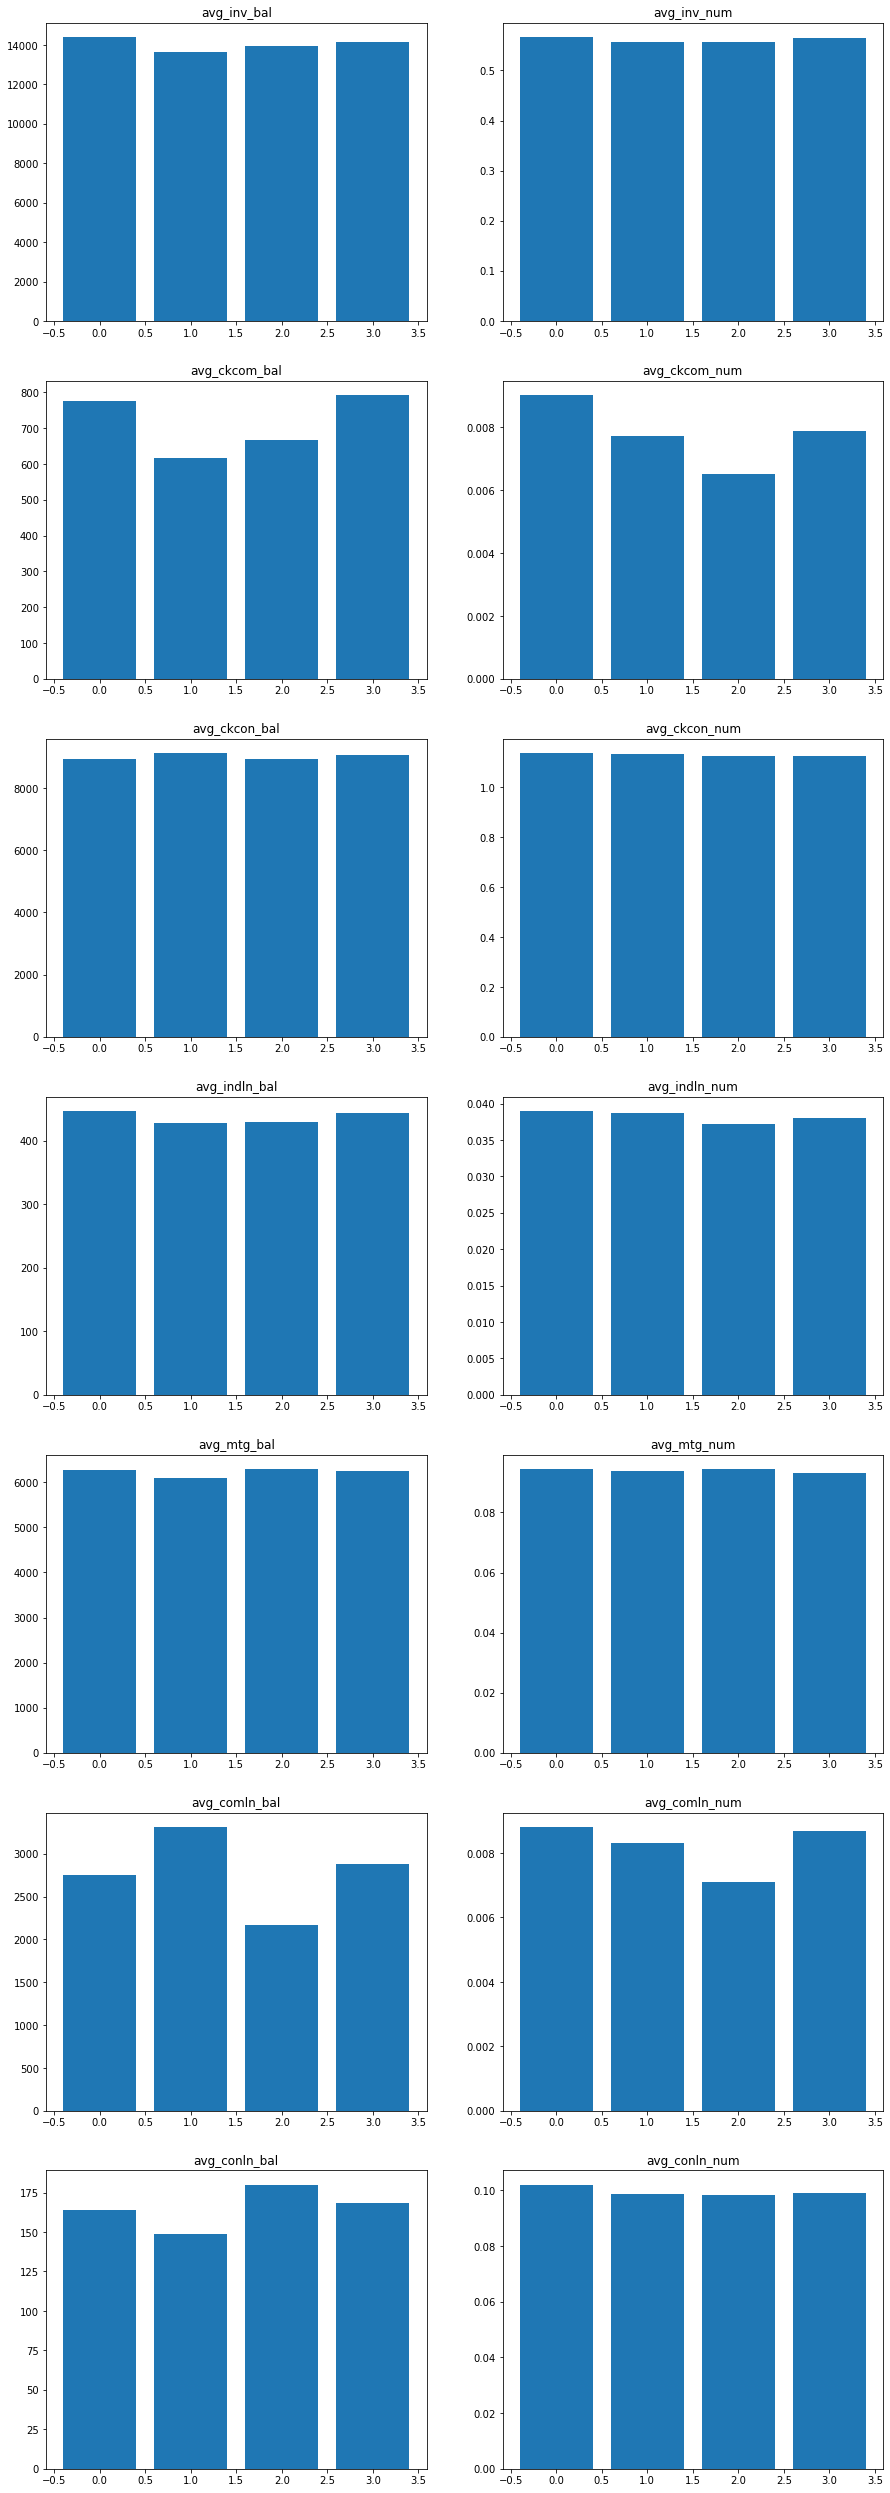

In [76]:
#bar_chart_trans(active_accts_mini_pca_freq,active_accts_mini_pca_freq.loc[:,'avg_inv_bal':'avg_conln_num'].columns)

In [ ]:
#demo_graphs(active_accts_mini_pca, active_accts_mini_pca_freq, minipca_clusters)

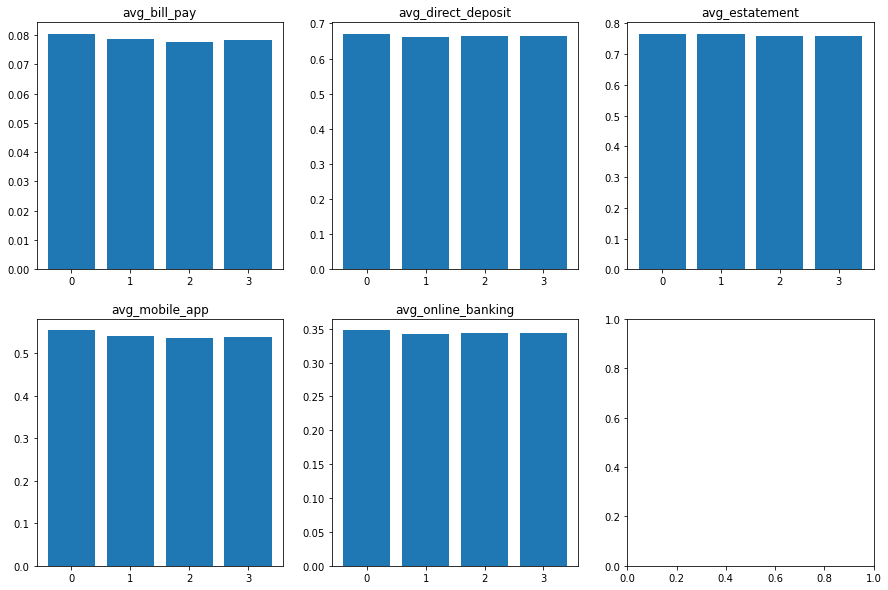

In [78]:
#bar_chart_ob_fees(active_accts_mini_pca_freq, active_accts_mini_pca_freq.loc[:,'avg_bill_pay':'avg_online_banking'].columns)

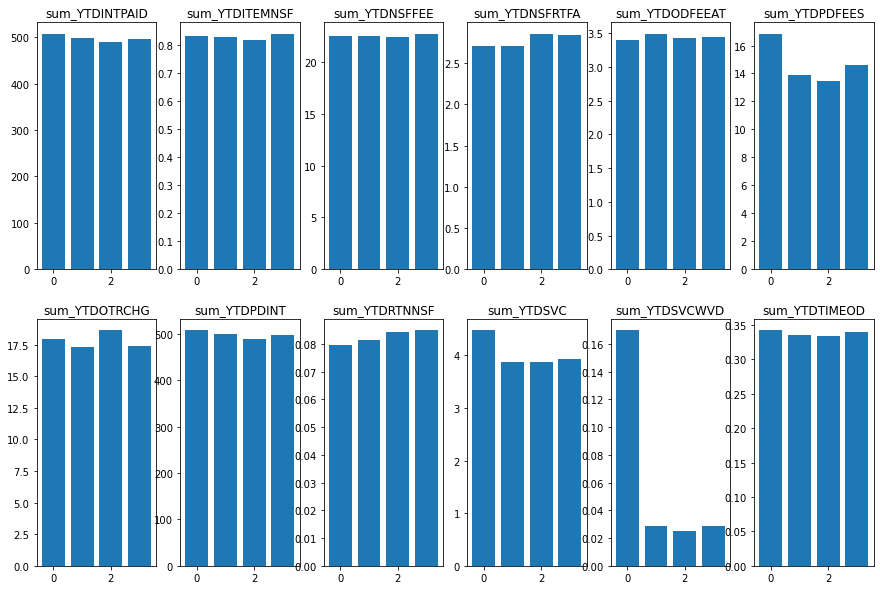

In [79]:
#bar_chart_ob_fees(active_accts_mini_pca_freq,active_accts_mini_pca_freq.loc[:,'sum_YTDINTPAID':'sum_YTDTIMEOD'].columns)

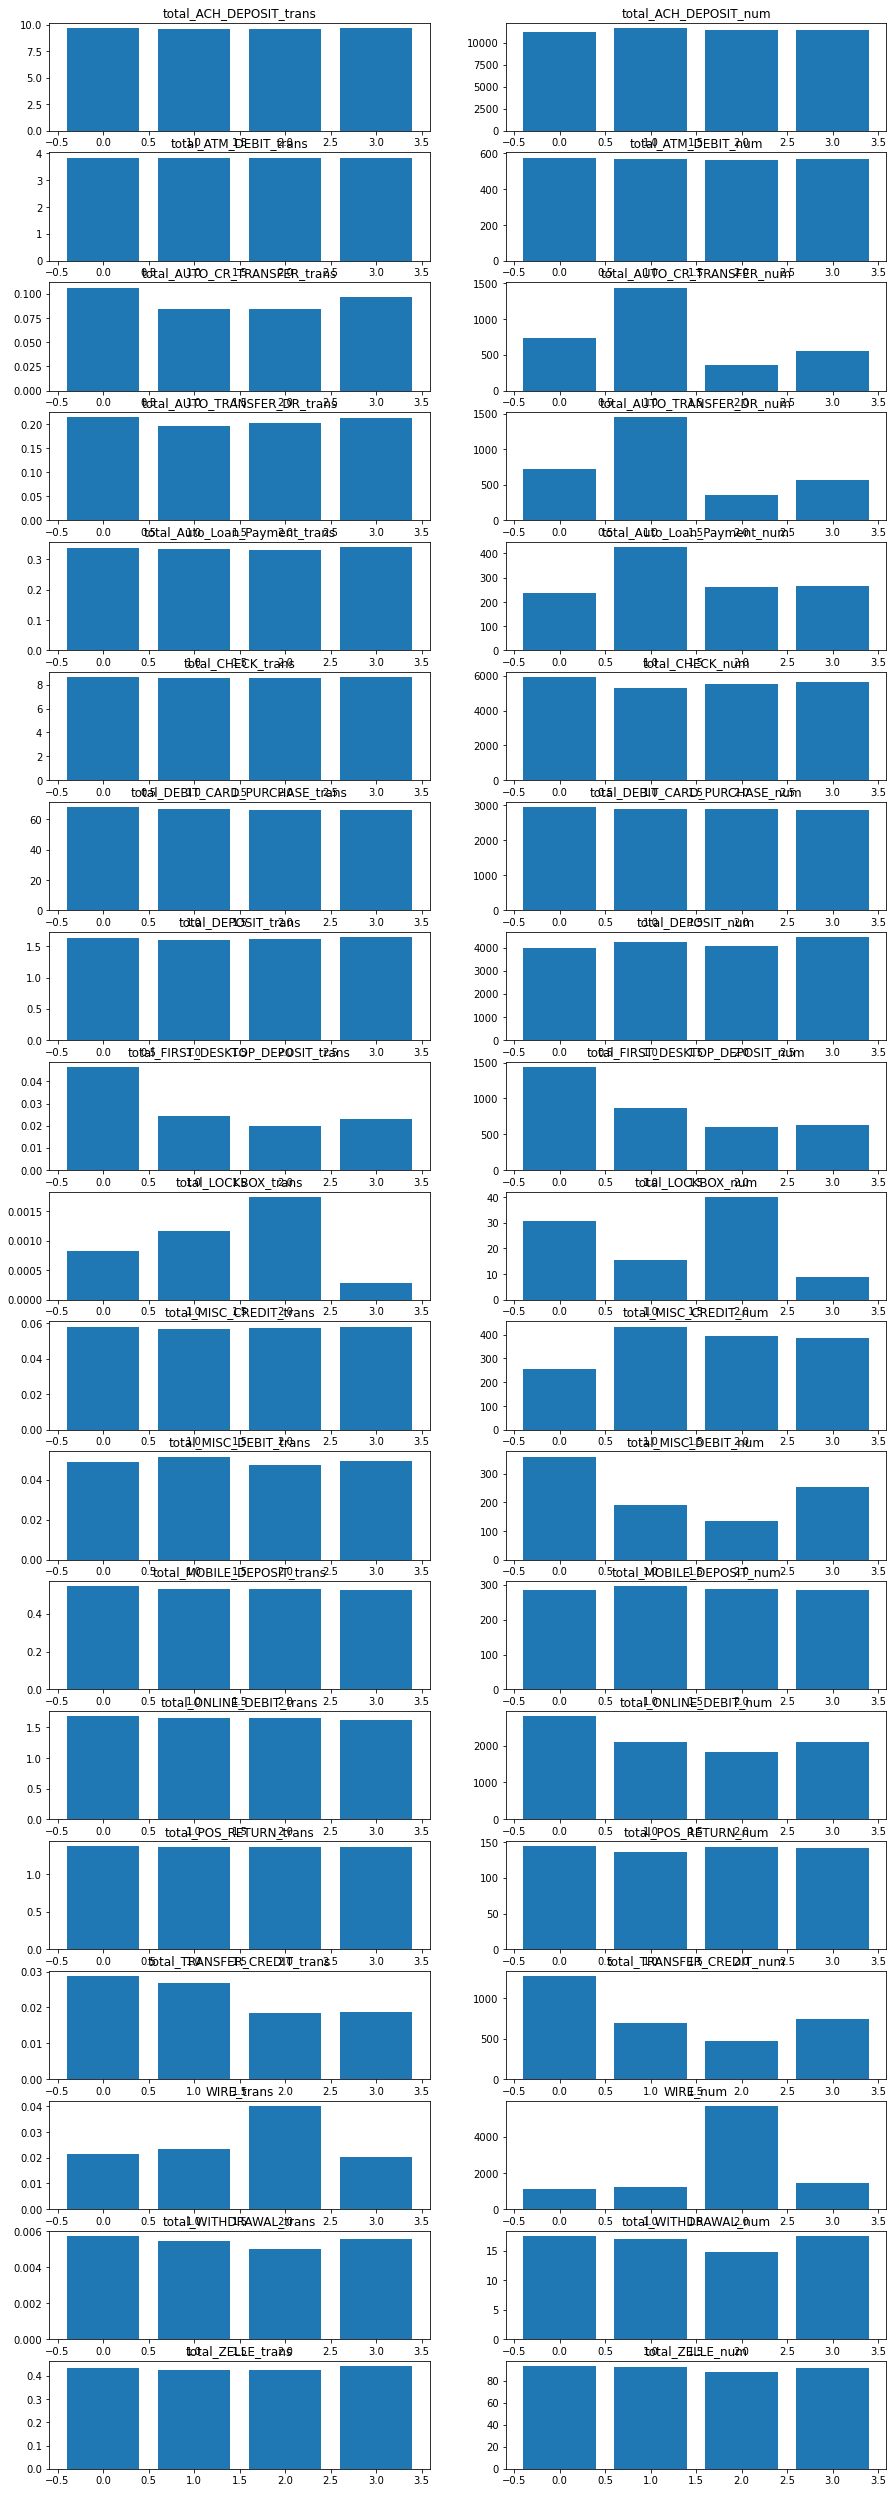

In [80]:
#bar_chart_trans(active_accts_mini_pca_freq,active_accts_mini_pca_freq.loc[:,'total_ACH_DEPOSIT_trans':'total_ZELLE_num'].columns)

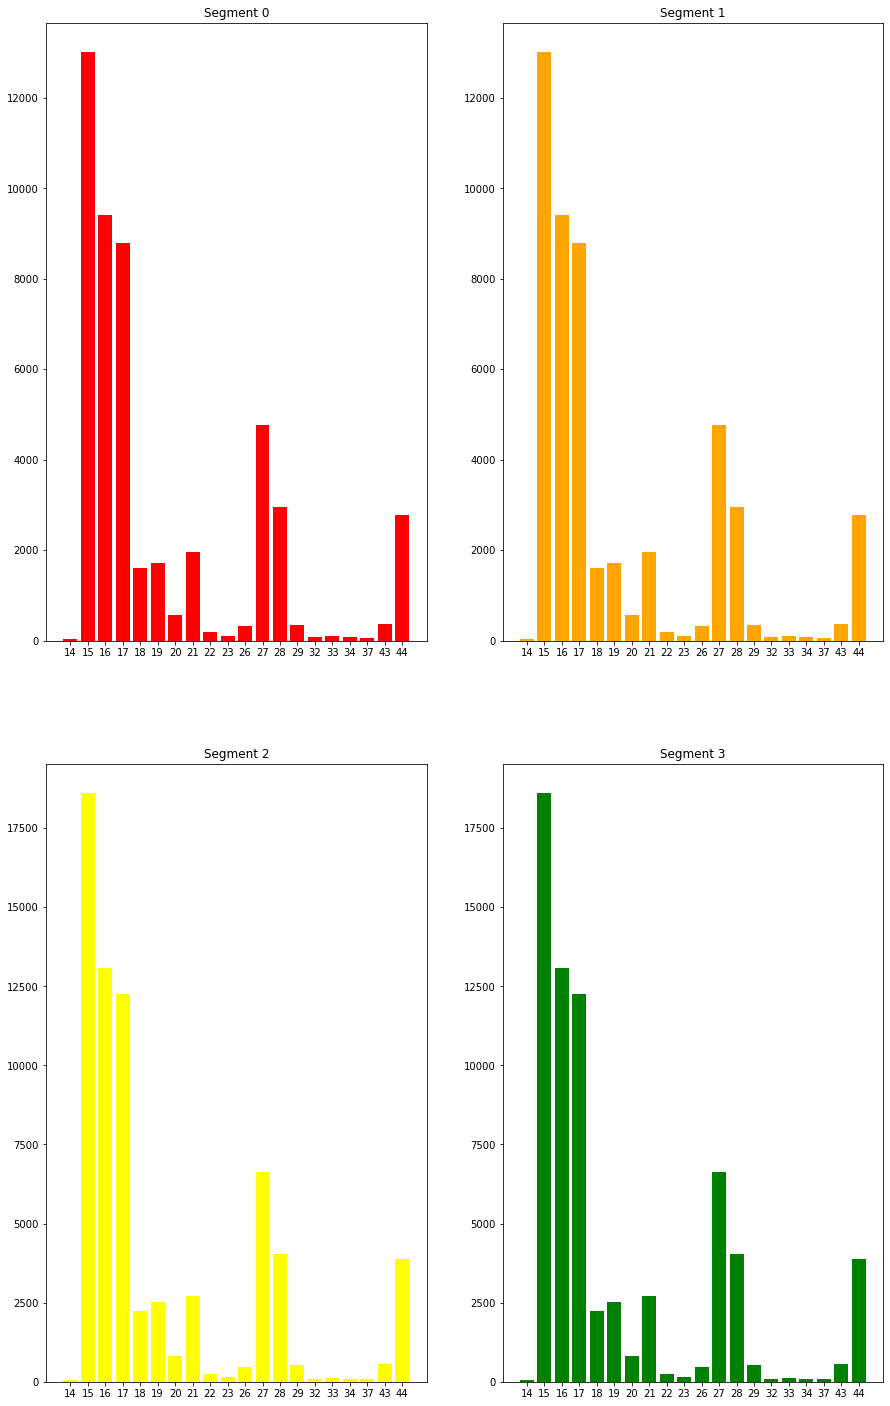

In [83]:
#zip_graphs(active_accts_mini_pca, minipca_clusters)

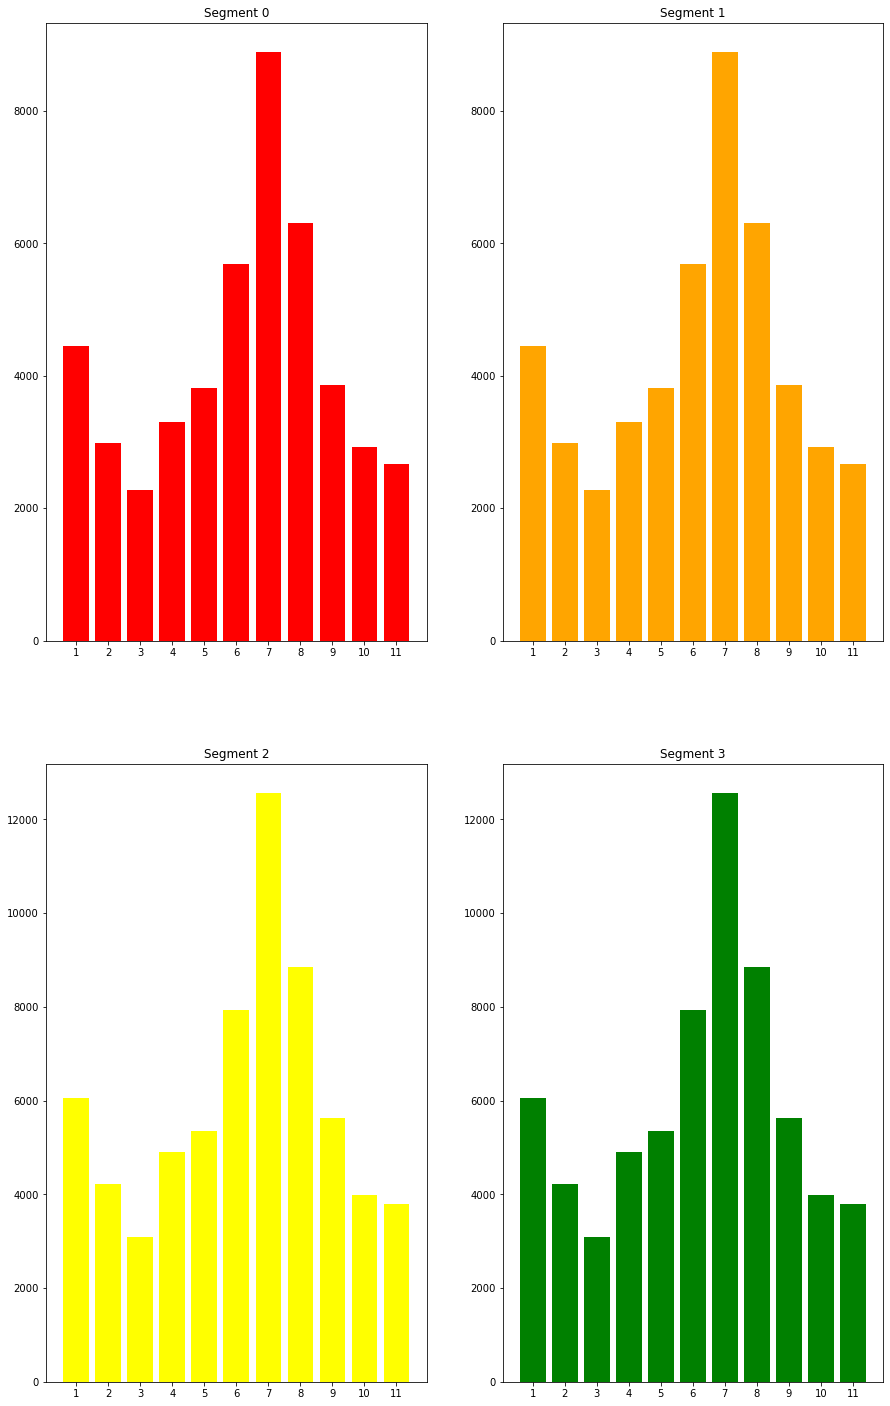

In [84]:
#networth_graphs(active_accts_mini_pca, minipca_clusters)

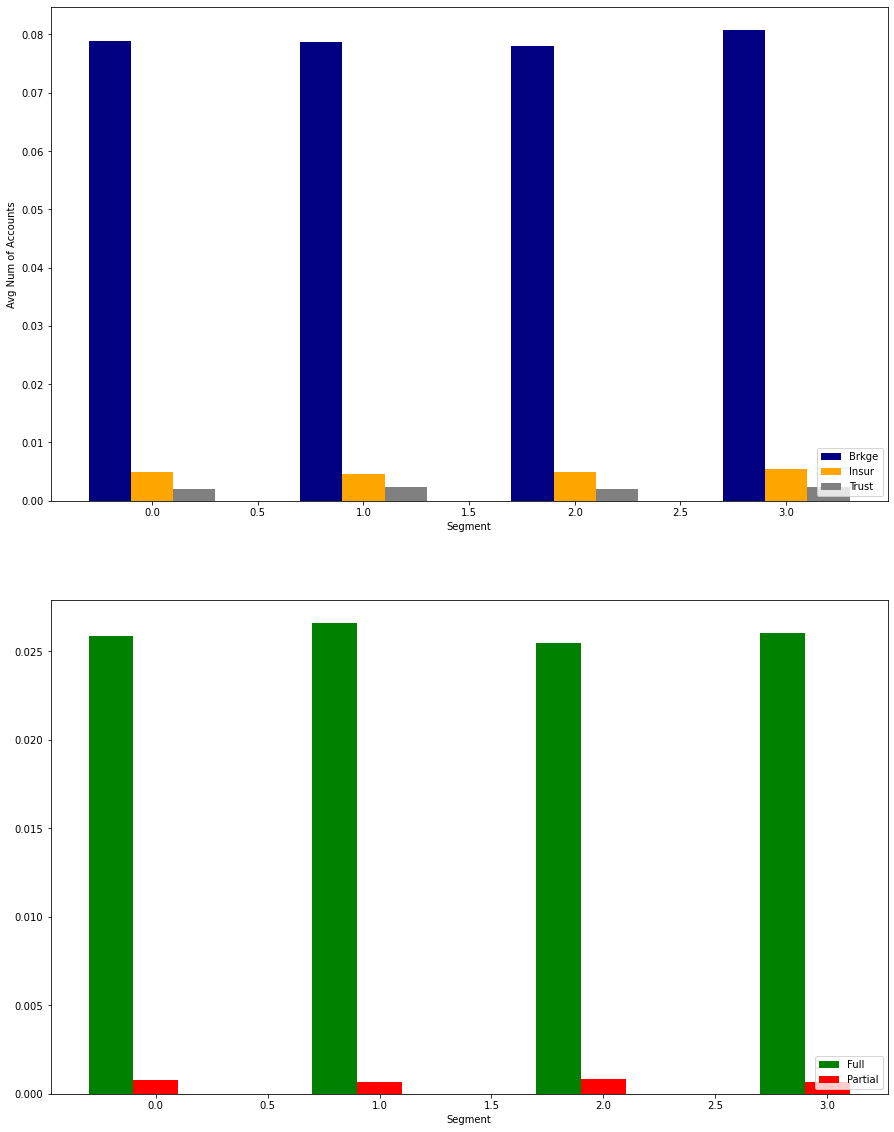

In [85]:
#bit_graphs(active_accts_mini_pca_freq, minipca_clusters)

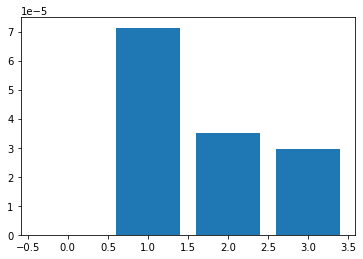

In [82]:
#sbloan_graphs(active_accts_mini_pca_freq, minipca_clusters)

### Summary Tables

In [52]:
dist_table_prop = pd.DataFrame({'KMiniBatch Prop': active_accts_mini_freq.loc[:,'Prop Obs'],
                                'KMiniBatch N': active_accts_mini_freq.loc[:,'N Obs'],
                               'KMini + PCA Prop': active_accts_mini_pca_freq.loc[:,'Prop Obs'],
                               'KMini + PCA N': active_accts_mini_pca_freq.loc[:,'N Obs']},
                          index = np.arange(max(minipca_clusters,mini_clusters)))
dist_table_prop

,KMiniBatch Prop,KMiniBatch N,KMini + PCA Prop,KMini + PCA N
0,0.007990,3949,0.100855,49848.0
1,0.014341,7088,0.141869,70119.0
2,0.081687,40374,0.345505,170767.0
3,0.258026,127530,0.411771,203519.0
4,0.637957,315312,NaN,NaN


In [53]:
top_features_all = feature_table([minikmeans, minikmeans_pca], [False, True], ["Mini", "Mini PCA"], 0.5,max(minipca_clusters,mini_clusters))
pd.options.display.max_colwidth = 500
top_features_all

,Mini,Mini PCA
0,"[NETWORTH_9.0, ZIP_27, income_60to75]","[Component 2, Component 1]"
1,"[total_POS_RETURN_trans, avg_mobile_app, total_POS_RETURN_num]","[Component 3, Component 6, Component 7]"
2,"[ownrent_O, MORESPON_R, DWELTYPE_S]","[Component 3, Component 7, Component 5]"
3,[],"[Component 7, Component 2, Component 1]"
4,"[NETWORTH_5.0, income_0to20, ZIP_16]",<class 'str'>


In [54]:
top_features_all["Mini PCA Features"] = ''

for i in range(minipca_clusters):
    # filters PCA eigenvectors based on important components to each cluster
    comp_ind = list(top_features_all["Mini PCA"][i])
    top_pca_feats = []
    for j in range(len(comp_ind)):
        # Selects 3 most important features of each component
        top_ind = abs(active_accts_pca_comp.loc[comp_ind[j]]).nlargest(3).index
        # Appends the names of the top 3 features per correlated component
        top_pca_feats.append((top_ind.values, active_accts_pca_comp.loc[comp_ind[j]][top_ind].round(3)))
    top_features_all["Mini PCA Features"][i] = top_pca_feats
    
pd.options.display.max_colwidth = 1000
top_features_all

,Mini,Mini PCA,Mini PCA Features
0,"[NETWORTH_9.0, ZIP_27, income_60to75]","[Component 2, Component 1]","[([total_DEBIT_CARD_PURCHASE_trans, avg_ckcon_num, total_DEBIT_CARD_PURCHASE_num], [-0.286, -0.28, -0.279]), ([total_CHECK_num, avg_ckcom_bal, total_CHECK_trans], [0.245, 0.243, 0.232])]"
1,"[total_POS_RETURN_trans, avg_mobile_app, total_POS_RETURN_num]","[Component 3, Component 6, Component 7]","[([ownrent_O, DWELTYPE_S, DWELTYPE_M], [-0.306, -0.293, 0.276]), ([homemktvalue_GT300k, ANNSPEND, NETWORTH_11.0], [0.319, 0.238, 0.232]), ([DWELTYPE_M, PROPTYPE_C, PROPTYPE_A], [0.304, -0.295, 0.285])]"
2,"[ownrent_O, MORESPON_R, DWELTYPE_S]","[Component 3, Component 7, Component 5]","[([ownrent_O, DWELTYPE_S, DWELTYPE_M], [-0.306, -0.293, 0.276]), ([DWELTYPE_M, PROPTYPE_C, PROPTYPE_A], [0.304, -0.295, 0.285]), ([sum_YTDITEMNSF, sum_YTDNSFFEE, sum_YTDNSFRTFA], [0.38, 0.375, 0.315])]"
3,[],"[Component 7, Component 2, Component 1]","[([DWELTYPE_M, PROPTYPE_C, PROPTYPE_A], [0.304, -0.295, 0.285]), ([total_DEBIT_CARD_PURCHASE_trans, avg_ckcon_num, total_DEBIT_CARD_PURCHASE_num], [-0.286, -0.28, -0.279]), ([total_CHECK_num, avg_ckcom_bal, total_CHECK_trans], [0.245, 0.243, 0.232])]"
4,"[NETWORTH_5.0, income_0to20, ZIP_16]",<class 'str'>,


In [58]:
# active_accts['NETWORTH'] = pd.to_numeric(active_accts["NETWORTH"])
# plt.figure(figsize=(6, 6))
# scatter = plt.scatter(active_accts['avg_ckcom_bal'],active_accts['sum_YTDINTPAID'],c = active_accts['Segment'], s = 3)
# plt.xlabel("Avg Ckncom Bal Rq1")
# plt.ylabel("Fees")
# plt.legend(handles=scatter.legend_elements()[0], labels = [0,1,2,3,4,5,6,7,8,9,10]);

In [69]:
from scipy.spatial import ConvexHull
from matplotlib.patches import Polygon
 
def hull_graphs(col1, col2):
    colors = ['C0','C1','C2','C3']
    centroids = minikmeans_pca.cluster_centers_
    cen_x = [i[0] for i in centroids] 
    cen_y = [i[1] for i in centroids]


    fig, ax=plt.subplots(1,1,figsize=(14,7))
    ## plot centers
    ax.scatter(cen_x, cen_y, marker='o', c=colors, s=60)
    for i in active_accts_mini_pca["Segment"].unique():
        points = active_accts_mini_pca[active_accts_mini_pca["Segment"] == i][[col1, col2]].values
        # get convex hull
        hull = ConvexHull(points)
        # get x and y coordinates
        # repeat last point to close the polygon
        x_hull = np.append(points[hull.vertices,0],
                           points[hull.vertices,0][0])
        y_hull = np.append(points[hull.vertices,1],
                           points[hull.vertices,1][0])
        # plot shape
        ax.fill(x_hull, y_hull, alpha=0.2, c=colors[i])

    ax.legend(active_accts_mini_pca["Segment"].unique())
    ax.set_title("HULL PLOT EXAMPLE")
    ax.set_xlabel(col1)
    ax.set_ylabel(col2);

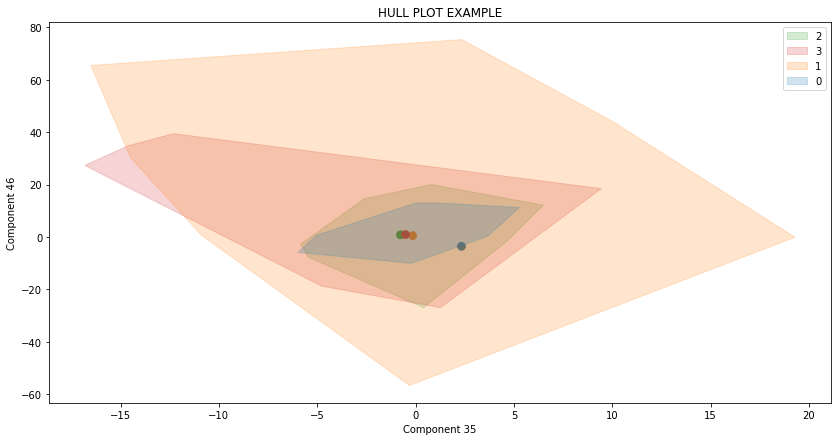

In [75]:
hull_graphs('Component 35', 'Component 46')